# "Forecasting: [...] Practice"

This jupyter notebook is based on the book "Forecasting: Principles and Practice" by R.J. Hyndman and G. Athanasopoulos (https://otexts.com/fpp3/). Here I develope some of the codes used in the book but adapted to Python.

Each section should be self-contain so that you do not need to run all the previous code.

## 1.- Getting started

### 1.1.- What can be forecast ? 

The predictability of an event or a quantity depends on several factors including:

* how well we understand the factors that contribute to it;
* how much data is available;
* how similar the future is to the past;
* whether the forecasts can affect the thing we are trying to forecast.

### 1.6.- The basic steps in a forecasting task

* Step 1: Problem definition.
* Step 2: Gathering information.
* Step 3: Preliminary (exploratory) analysis.
* Step 4: Choosing and fitting models.
* Step 5: Using and evaluating a forecasting model.


## 2.- Time series graphics

### 2.1.- _Pandas Data Frame_ objects

In [1]:
import os 
import pandas as pd 
from dotenv import load_dotenv

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [37]:
df.describe()

,Temperature
count,209228.000000
mean,13.020512
std,4.258447
min,-0.600000
25%,10.500000
50%,12.800000
75%,15.500000
max,34.000000


### 2.2.- Time plots

In [ ]:
import os 
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

<Figure size 800x1200 with 0 Axes>

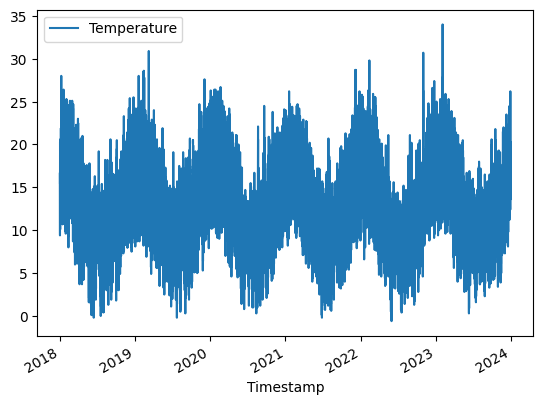

<Figure size 800x1200 with 0 Axes>

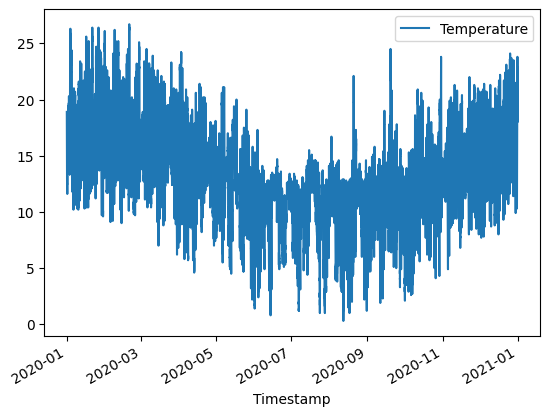

<Figure size 800x1200 with 0 Axes>

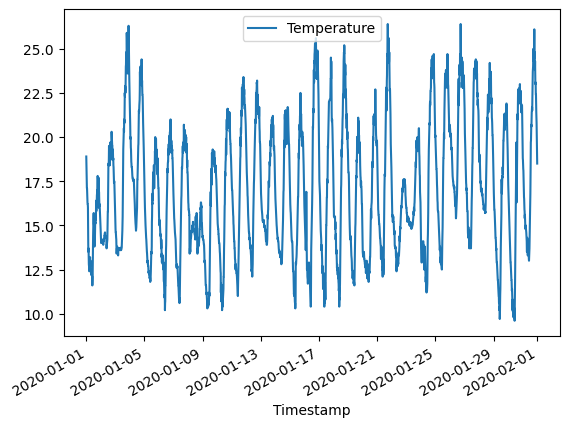

<Figure size 800x1200 with 0 Axes>

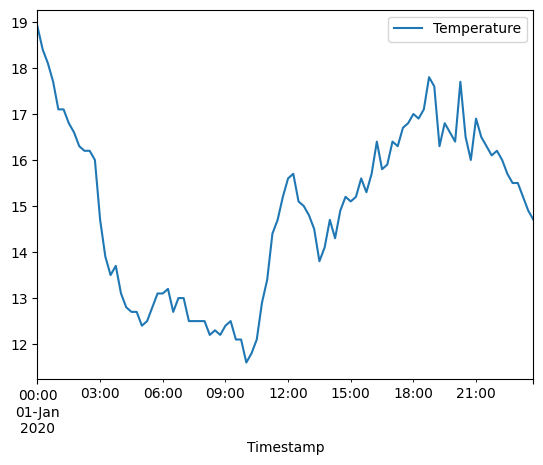

In [36]:
plt.figure(figsize = (8,12))
df.plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01-01'].plot()
plt.show()

### 2.3.- Time series patterns

* **Trend:** A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.
* **Seasonal:** A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period.
* **Cyclic:** A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.

### 2.4.- Seasonal plots

In [38]:
import os 
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

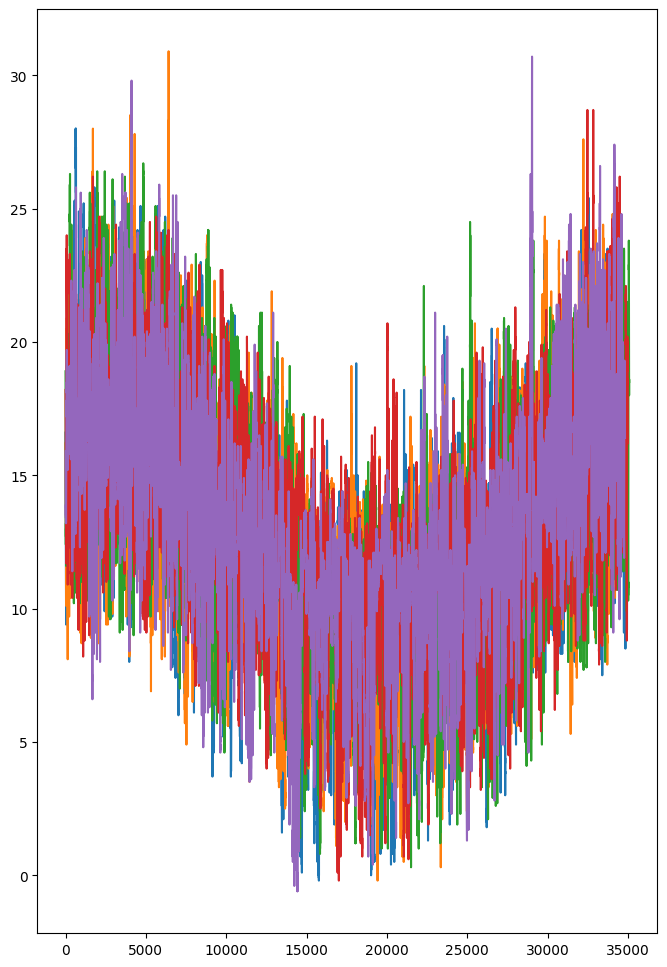

In [42]:
plt.figure(figsize = (8,12)) 
for year in range(2018,2023):
    plt.plot(df.loc[str(year)].values)
plt.show()

### 2.5.- Seasonal subseries plots

In [63]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [49]:
df_resample = df.resample('1M').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_35376\949980125.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resample = df.resample('1M').mean()


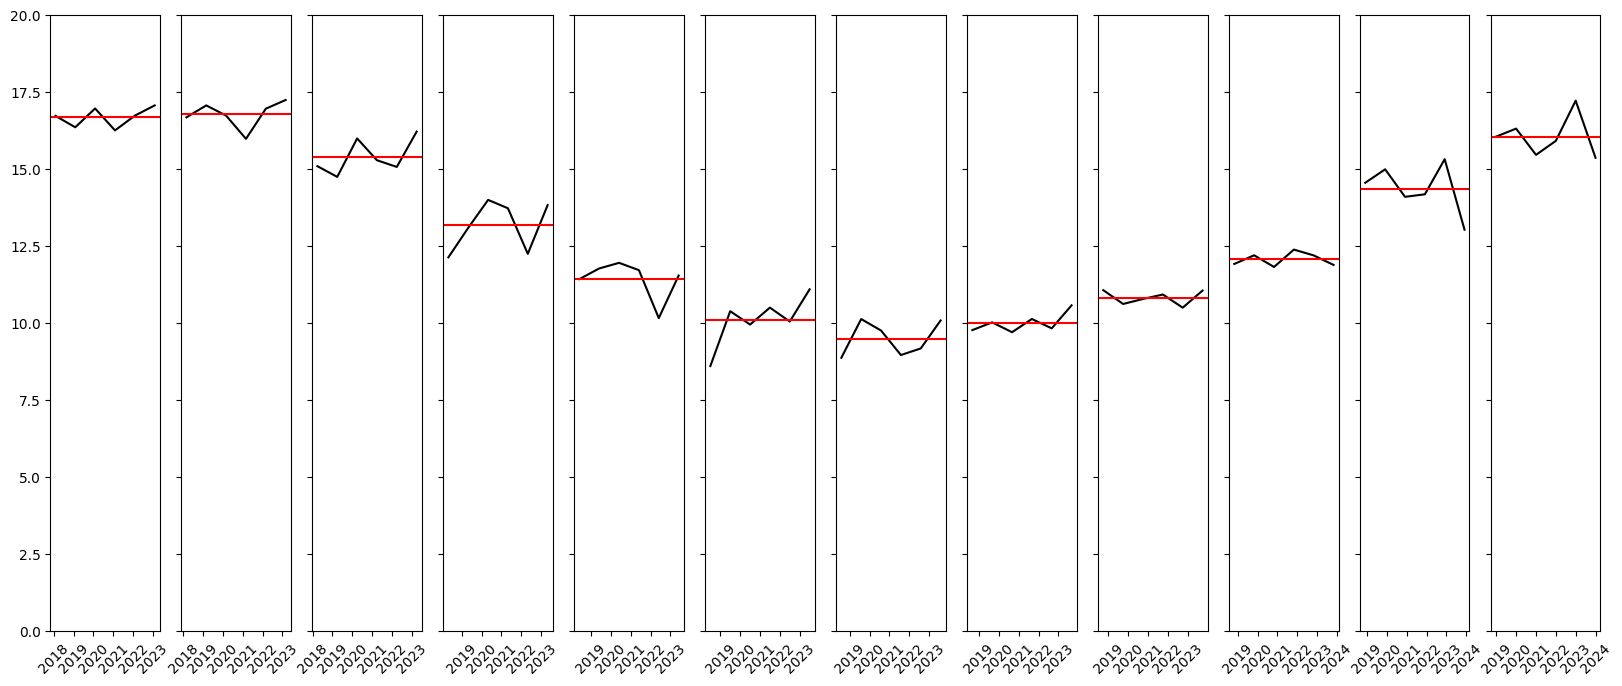

In [78]:
fig, axs = plt.subplots(1,12,figsize =(20,8),sharey = True)

for i in range(0,12):
    var_plot = df_resample[df_resample.index.month == i+1]
    axs[i].plot(var_plot, color = 'black')
    axs[i].axhline(np.mean(var_plot),color = 'red')
    axs[i].set_ylim([0,20])
    axs[i].tick_params(axis='x', rotation=45)
    